<a href="https://colab.research.google.com/github/Atruk/UAI_HW/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт модулей

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, Adadelta
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from google.colab import drive
from keras.callbacks import History
from pprint import pprint
from tensorflow.keras.datasets import mnist
%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Light

## 1-2

In [ ]:
def prepare_data_mnist(n_train):
  # Загрузка данных MNIST
  (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

  # Изменение формата входных изображений с 28х28 на 784х1
  x_train_org = x_train_org[:n_train]
  y_train_org = y_train_org[:n_train]
  x_train = x_train_org.reshape(n_train, 784)
  x_test = x_test_org.reshape(10000, 784)

  # print(x_train_org.shape)
  # print(y_train_org.shape)
  # print(x_test_org.shape)
  # print(y_test_org.shape)

  # Нормализация входных изображений
  x_train = x_train.astype('float32')
  x_train = x_train / 255
  x_test = x_test.astype('float32')
  x_test = x_test / 255

  # Преобразование ответов в формат one_hot_encoding
  y_train = utils.to_categorical(y_train_org, 10)
  y_test = utils.to_categorical(y_test_org, 10)

  return x_train, y_train, x_test, y_test


In [ ]:
def create_model_mnist():
  # Создание НС
  model = Sequential()
  # Добавление слоев
  model.add(Dense(800, input_dim=784, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # Компиляция НС
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  #print(model.summary())

  return model

In [ ]:
n_train_arr = [60000, 50000, 10000, 1000, 500, 100]
val_acc_arr = []
acc_arr = []
for n_train in n_train_arr:
  print('*' * 30)
  print(f'n_train={n_train}')
  print('-' * 30)
  x_train, y_train, x_test, y_test = prepare_data_mnist(n_train)
  model = create_model_mnist()
  history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)
  acc_arr.append(history.history['accuracy'][-1])
  val_acc_arr.append(history.history['val_accuracy'][-1])
  print('*-' * 30)
  print()

print(f'acc_arr={acc_arr}')
print(f'val_acc_arr={val_acc_arr}')



******************************
n_train=60000
------------------------------
Epoch 1/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2294 - accuracy: 0.9330 - val_loss: 0.1274 - val_accuracy: 0.9622
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9749 - val_loss: 0.0891 - val_accuracy: 0.9736
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0775 - val_accuracy: 0.9764
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9910 - val_loss: 0.0974 - val_accuracy: 0.9731
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0970 - val_accuracy: 0.9751
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss

In [ ]:
# Сравнительная таблица
df_dict = {'n_train': [60000, 50000, 10000, 1000, 500, 100],
           'accuracy': acc_arr,
           'val_accuracy': val_acc_arr}
df = pd.DataFrame(df_dict)
df

,n_train,accuracy,val_accuracy
0,60000,0.998312,0.979083
1,50000,0.996725,0.972500
2,10000,1.000000,0.951000
3,1000,1.000000,0.875000
4,500,1.000000,0.840000
5,100,1.000000,0.950000


При уменьшении размеров выборок обучающих примеров val_accuracy уменьшается, но при n_train = 100 показывает высокую точность.

## 3

### 4 Dense слоя

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_72 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_73 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1010      
Total params: 989,510
Trainable params: 989,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2339 - accuracy: 0.9310 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.973

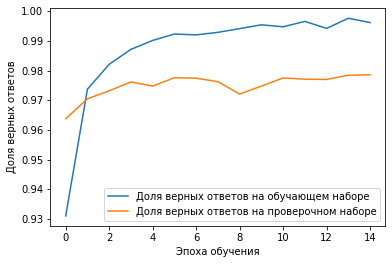

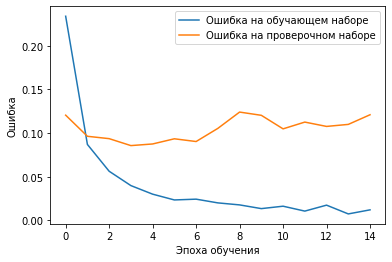

In [ ]:
# 4 Dense слоя
def create_model_mnist_4_dense():
  # Создание НС
  model = Sequential()
  # Добавление слоев

  model.add(Dense(800, input_dim=784, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # Компиляция НС
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  return model

n_train = 60000
x_train, y_train, x_test, y_test = prepare_data_mnist(n_train)
model = create_model_mnist_4_dense()
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# График ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### 3 Dropout слоя

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_______________________________________________

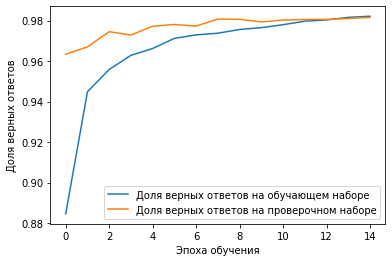

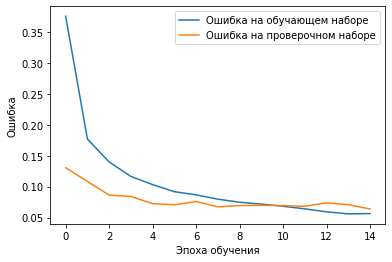

In [ ]:
# 3 Dropout слоя
def create_model_mnist_3_dropout():
  # Создание НС
  model = Sequential()
  # Добавление слоев
  model.add(Dropout(0.3, input_shape=(784, )))
  model.add(Dense(800, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(400, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  # Компиляция НС
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  return model

n_train = 60000
x_train, y_train, x_test, y_test = prepare_data_mnist(n_train)
model = create_model_mnist_3_dropout()
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# График ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### 3 BatchNormalization слоя

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_78 (Dense)             (None, 800)               628000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 800)               3200      
_________________________________________________________________
dense_79 (Dense)             (None, 400)               320400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_80 (Dense)             (None, 10)                4010      
Total params: 960,346
Trainable params: 956,378
Non-trainable params: 3,968
___________________________________________

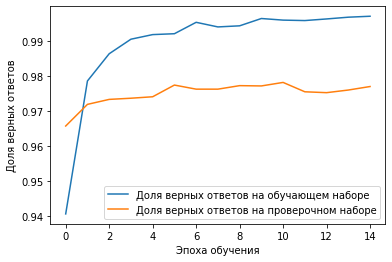

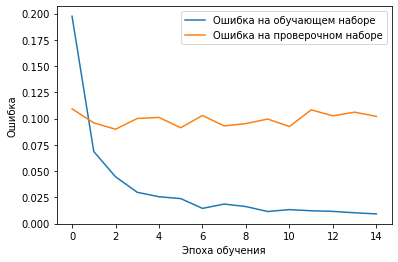

In [ ]:
# 3 BatchNormalization слоя
def create_model_mnist_3_batchnorm():
  # Создание НС
  model = Sequential()
  # Добавление слоев
  model.add(BatchNormalization(input_shape=(784, )))
  model.add(Dense(800, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(400, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  # Компиляция НС
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  return model

n_train = 60000
x_train, y_train, x_test, y_test = prepare_data_mnist(n_train)
model = create_model_mnist_3_batchnorm()
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# График ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()


При Dropout и BatchNormalization ошибке ниже, чем при 4 слоях  Dense. Точность при использовании Dropout выше, чем остальных. Точность при 4 слоях Dense и BatchNormalization примерно одинаковы.

### Все слои вместе

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_81 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 800)               3200      
_________________________________________________________________
dense_82 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)             

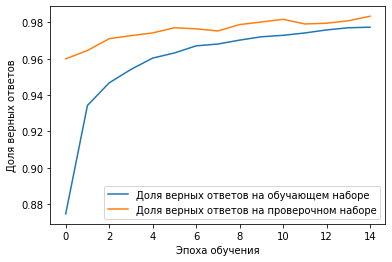

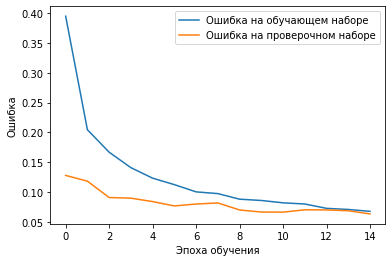

In [ ]:
# 4 Dense слоя
def create_model_mnist_all_layers():
  # Создание НС
  model = Sequential()
  # Добавление слоев
  model.add(Dropout(0.3, input_shape=(784, )))
  model.add(BatchNormalization())
  model.add(Dense(800, activation='relu'))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(400, activation='relu'))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # Компиляция НС
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  return model

n_train = 60000
x_train, y_train, x_test, y_test = prepare_data_mnist(n_train)
model = create_model_mnist_all_layers()
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# График ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

При использовании Dropout, BatchNormalization + дополнительный слой Dense - высокая точность, уменьшение ошибки

# Pro

## 1 Вариант

### Подготовка данных

In [ ]:
# Загрузка данных из sonar.csv
df = pd.read_csv("/content/drive/My Drive/sonar.csv", header=None)   
df.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
print(df.shape) # Размерность данных

(208, 61)


In [ ]:
dataset = df.values                 
X = dataset[:,:-1].astype(float)   
Y = dataset[:,-1]                  
Y[Y=='R']='0'                      
Y[Y=='M']='1'                      
Y = Y.astype(int)                   
print(X.shape) # Размерность X                      
print(Y.shape) # Размерность Y                    
print(Y)        

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


### Создание НС

In [ ]:
def create_model_sonar():
  model = Sequential()
  model.add(Dropout(0.1, input_shape=(60,)))
  #model.add(BatchNormalization())
  model.add(Dense(60, activation='relu'))
  model.add(Dropout(0.1))
  #model.add(BatchNormalization())
  model.add(Dense(30,  activation='relu'))
  model.add(Dropout(0.1))
  #model.add(BatchNormalization())
  model.add(Dense(20,  activation='relu'))
  model.add(Dropout(0.1))
  #model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model




(132, 60)
(34, 60)
(132,)
(34,)
Epoch 1/200
9/9 [==============================] - 0s 16ms/step - loss: 0.7131 - accuracy: 0.4167 - val_loss: 0.6988 - val_accuracy: 0.4706
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5227 - val_loss: 0.6904 - val_accuracy: 0.5588
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5227 - val_loss: 0.6845 - val_accuracy: 0.6765
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.5530 - val_loss: 0.6806 - val_accuracy: 0.6765
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5606 - val_loss: 0.6795 - val_accuracy: 0.6471
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5682 - val_loss: 0.6787 - val_accuracy: 0.5882
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5909 - val_loss: 0.6789 - val_accuracy: 0

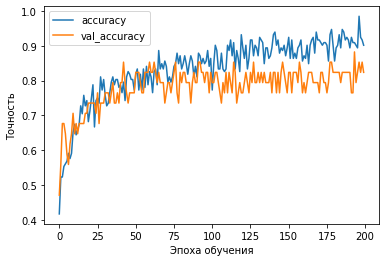

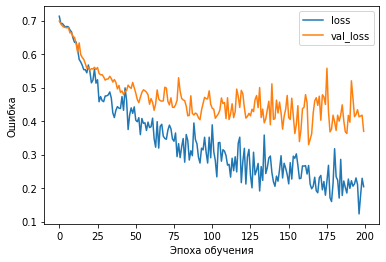

2/2 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9048
[0.2163863629102707, 0.9047619104385376]


In [ ]:
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,
                                                          y_train,
                                                          test_size=0.2)

print(x_train_new.shape)
print(x_val.shape)
print(y_train_new.shape)
print(y_val.shape)

model = create_model_sonar()

history = model.fit(x_train,
                    y_train,
                    batch_size=15, #8, 15
                    epochs=200, #100
                    validation_split=0.2,
                    verbose=1)

# График точности
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

# График ошибки
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

print(model.evaluate(x_test, y_test))

## 2 Вариант

In [ ]:
cars = pd.read_csv('/content/drive/My Drive/cars_new.csv', sep=',')
cars

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
...,...,...,...,...,...,...,...,...,...,...
70114,skoda,fabia 5j [рестайлинг],310000,2011,165000,хетчбэк,механика,бензин,1.2,70.0
70115,ford,focus 3 поколение,400000,2011,125000,хетчбэк,механика,бензин,1.6,105.0
70116,mazda,cx-5 1 поколение,1140000,2013,89981,кроссовер,автомат,бензин,2.0,150.0
70117,toyota,bb 2 поколение,550550,2006,183000,минивэн,автомат,бензин,1.3,92.0


In [ ]:
print(cars.values.shape)

(70119, 10)


In [ ]:
# Создание словаря
def create_dict(s):
  ret = {}                          
  for _id, name in enumerate(s):    
    ret.update({name: _id})         
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
# Создание словарей по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Цены
prices = np.array(cars['price'], dtype=np.float)

# числовые параметры и нормирование
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
# Создание пустой обучающей выборки
x_train = []
y_train = []

# Проход по всем машинам
for _id, car in enumerate(np.array(cars)):
  # Добавление цены в y_train
  y_train.append(prices[_id])
  
  # Объединение всех параметров в x_train
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  x_train.append(x_tr)

x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [ ]:
# Размеры выборок
print(x_train.shape)
print(y_train.shape)

(70119, 3208)
(70119,)


In [ ]:
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          1.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [ ]:
print(y_train[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [ ]:
y_train.shape

(70119,)

In [ ]:
y_train.reshape(-1,1).shape

(70119, 1)

In [ ]:
y_train.reshape(-1,1)

array([[-0.20479438],
       [ 0.54078061],
       [-0.63770889],
       ...,
       [ 0.04373062],
       [-0.44530244],
       [ 1.57496528]])

In [ ]:
# Нормализация y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
y_train_scaled.shape

(70119,)

In [ ]:
# Базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]
[ 0.75082432 -0.62135434  0.3563911   0.70913625 -0.51745486  0.73318706
  0.09824578 -0.04445567  1.27032173 -0.4132347 ]


In [ ]:
y_scaler.inverse_transform(y_train_scaled)

array([ 996000.,  140200.,  750000., ..., 1140000.,  550550.,  430000.])

In [ ]:
def create_model_cars():
  # Создание НС
  model_ula = Sequential()
  # Добавление слоев
  model_ula.add(Dropout(0.3, input_shape=(3208, )))
  model_ula.add(Dense(3208, activation='relu'))
  model_ula.add(Dropout(0.3))
  model_ula.add(Dense(1604, activation='relu'))
  model_ula.add(Dropout(0.3))
  model_ula.add(Dense(802, activation='relu'))
  model_ula.add(Dropout(0.3))
  model_ula.add(Dense(1, activation='sigmoid'))
  # Компиляция НС
  model_ula.compile(loss='mse', optimizer=Adam(lr=0.001))

  #print(model.summary())

  return model_ula

In [ ]:
# x_tr_new, x_valid, y_tr_new, y_valid = train_test_split(x_train,
#                                                           y_train_scaled,
#                                                           test_size=0.2,
#                                                           shuffle=True)

# print(x_tr_new.shape)
# print(x_valid.shape)
# print(y_tr_new.shape)
# print(y_valid.shape)

# model_ula = create_model_cars()

# model_ula.fit(x_tr_new, y_tr_new, batch_size=1000, epochs=100, validation_data=(x_valid, y_valid), verbose=True)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,
                                                    y_train_scaled,
                                                    test_size=0.2,
                                                    shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

model_ula = create_model_cars()

model_ula.fit(x_tr_new, y_tr_new, batch_size=1000, epochs=100, verbose=True)


(56095, 3208)
(14024, 3208)
(56095,)
(14024,)
Epoch 1/100
57/57 [==============================] - 2s 31ms/step - loss: 0.7557
Epoch 2/100
57/57 [==============================] - 2s 30ms/step - loss: 0.7052
Epoch 3/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6995
Epoch 4/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6960
Epoch 5/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6950
Epoch 6/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6929
Epoch 7/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6937
Epoch 8/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6920
Epoch 9/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6928
Epoch 10/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6932
Epoch 11/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6916
Epoch 12/100
57/57 [==============================] - 2s 30ms

In [ ]:
predict = model_ula.predict(x_test)

In [ ]:
y_scaler.inverse_transform(y_train_scaled).shape

(70119,)

In [ ]:
predict_inverse = y_scaler.inverse_transform(predict).flatten()
predict_inverse

array([723343.8, 527726.1, 527726.1, ..., 527726.1, 527726.1, 754419.8],
      dtype=float32)

In [ ]:
y_test_inverse = y_scaler.inverse_transform(y_test).flatten()
y_test_inverse

array([750000., 250000., 425000., ..., 250000., 365000., 880000.])

In [ ]:
predict.reshape(-1, 1)

array([[3.1365094e-01],
       [0.0000000e+00],
       [1.9094780e-18],
       ...,
       [0.0000000e+00],
       [4.9364847e-29],
       [3.6347774e-01]], dtype=float32)

In [ ]:
y_test

array([ 0.3563911 , -0.44530244, -0.1647097 , ..., -0.44530244,
       -0.26091293,  0.56483142])

In [ ]:
# суммарная ошибка
(abs(predict_inverse - y_test_inverse)).mean() / (y_test_inverse.mean())

0.4985121035894201

In [ ]:
abs(predict_inverse - y_test_inverse) / y_test_inverse

array([0.03554158, 1.1109045 , 0.24170853, ..., 1.1109045 , 0.445825  ,
       0.14270476])